# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [4]:
csv = pd.read_csv('Employee.csv')
employee = pd.DataFrame(csv)
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [42]:
employee[['Department', 'Salary']].groupby(['Department']).mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [22]:
employee.pivot_table(index=["Department"], values=["Salary"], aggfunc='mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [53]:
employee.pivot_table(index=["Department", "Title"], values=["Salary"], aggfunc='mean').T

Department    HR            IT                       Sales
Title         VP analyst    VP analyst associate associate
Salary      70.0    32.5  70.0    32.5      60.0      55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [88]:
employee.pivot_table(index=["Title", "Years"], values=["Salary"], aggfunc=['mean'])

mean
                Salary
Title     Years       
VP        8       70.0
analyst   1       35.0
          2       30.0
          4       35.0
associate 2       55.0
          3       55.0
          7       60.0

In [57]:
#help(pd.pivot_table)

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [89]:
employee.pivot_table(index=["Department","Title"], values=["Salary"], aggfunc=['mean', 'count'])

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [94]:
employee.pivot_table(index = ['Department','Title'], values = ['Salary'], aggfunc=['median','min','max','std',])

#There is no deviation in some values because the median, min and max salary are the same
#and therefore there are no values scattered away from the median. 


median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [96]:
employee.pivot_table(index = ['Department','Title'], values = ['Salary'], aggfunc=['median','min','max','std'], fill_value = 0)

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [97]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [105]:
employee.pivot_table(index = ['Department', 'Title'], values=['Salary'], aggfunc=['count','sum'])

count    sum
                     Salary Salary
Department Title                  
HR         VP             1     70
           analyst        2     65
IT         VP             1     70
           analyst        2     65
           associate      1     60
Sales      associate      2    110

#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [112]:
employee.pivot_table(index = ['Department', 'Title'], values=['Salary', 'Years'], aggfunc = {'Salary': 'mean', 'Years':'sum'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [ ]:
# your answer here

In [ ]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [116]:
fb_csv = pd.read_csv('Fitbit.csv')
fitbit = pd.DataFrame(fb_csv)
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [119]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [122]:
fitbit.describe().T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [156]:
fitbit[['Minutes Very Active', 'Steps']].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [135]:
import matplotlib.pyplot as plt

In [142]:
#help(plt.scatter)

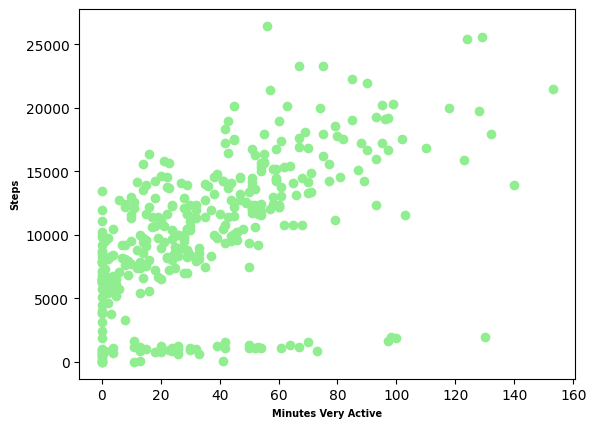

In [155]:
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'], c='LightGreen')
plt.xlabel('Minutes Very Active', fontsize=7, fontweight='bold')
plt.ylabel('Steps', fontsize=7, fontweight='bold');

#### What can you say about Minute Very Active and Steps? Write a comment below

Looking at the scatter plot we can asume that there is a positive correltion between both values, meaning that the longer you exercise you do more steps, which makes perfect sense.


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [157]:
fitbit[['Minutes Sedentary', 'Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

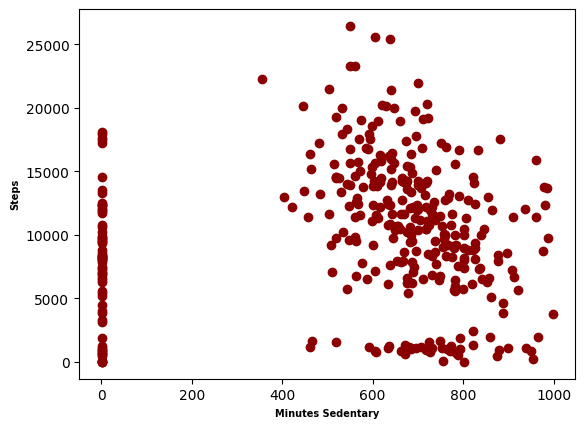

In [199]:
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'], c='DarkRed')
plt.xlabel('Minutes Sedentary', fontsize=7, fontweight='bold')
plt.ylabel('Steps', fontsize=7, fontweight='bold');

In this case what we see is a relation between the amount of steps and the amout of time they rest or they are non active. 
There is not much relation between both values as we can see, the correlation is of 0.077.
So what we can deduct is that 

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [177]:
fitbit[['MinutesOfSleep', 'Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

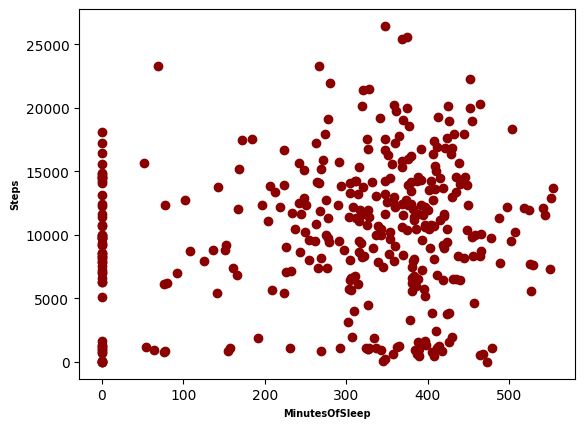

In [180]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'], c='DarkRed')
plt.xlabel('MinutesOfSleep', fontsize=7, fontweight='bold')
plt.ylabel('Steps', fontsize=7, fontweight='bold');

What we see is that there is a relation between how much people sleep regarding how active they are, meaning that people who do more steps aka people who workout a lot are more inclined to sleep more, due "possibly" a exaustion.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [183]:
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[column].corr()

In [184]:
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [198]:
cor_fit['Steps'].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [201]:
tg_csv = pd.read_csv('Time_Grades.csv')
time_grades = pd.DataFrame(tg_csv)

In [202]:
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

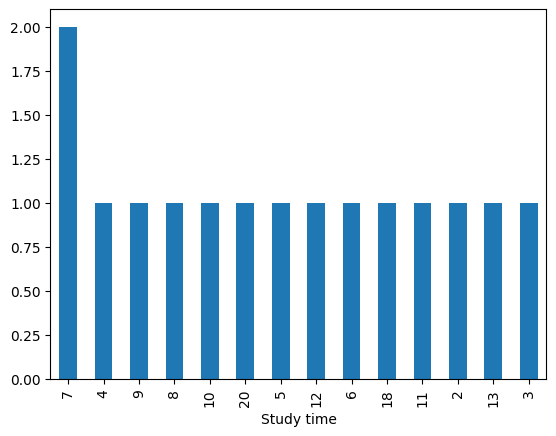

In [221]:
time_grades['Study time'].value_counts().plot(kind='bar');

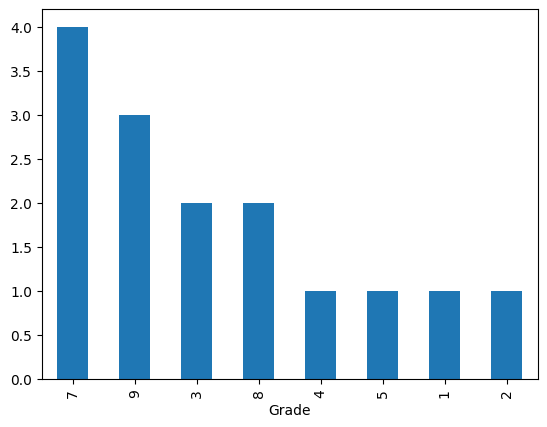

In [222]:
time_grades['Grade'].value_counts().plot(kind='bar');

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [224]:
time_grades[['Study time', 'Grade']].corr('pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [225]:
time_grades[['Study time', 'Grade']].corr('spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


As we can see there is a slight difference between both methods. For Pearson the correlation is less than for Spearman.

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

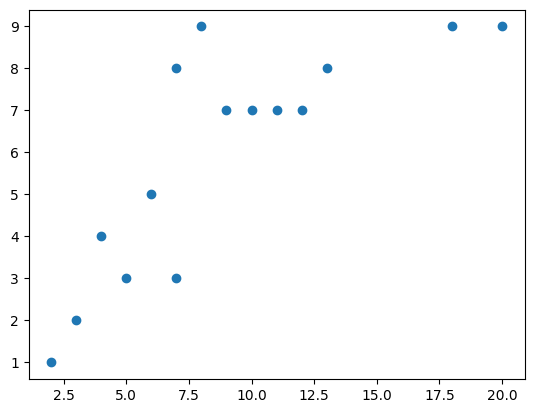

In [230]:
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade']);

What we see in the scatter plot is that there is an "almost" linear relation between both values, meaning that the more you study the better you grades would be. It doesn't always happen, but it would be the standard, this is wahy the result is not a straight line.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

The Pearson correlation evaluates the linear relationship between both variables (Grades and Study Time). The relationship is linear when a change in one variable is associated with a proportional change in the other variable.

The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

This means that if the relationship is that one variable increases when the other increases, but the amount is not consistent, the Pearson correlation coefficient is positive but less than +1. The Spearman coefficient still equals +1.